Импорты библиотек

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests


Задание 1

In [163]:
array = np.random.randint(10, 100, 50)
print(f'Среднее арифметическое массива: {array.mean()}')
print(f'Медиана массива: {np.median(array)}')
print(f'Стандартное отклонение массива: {np.std(array)}')
new_array = array / 3
print(f"новый массив, где каждое число изначального массива делится на 3:")
display(new_array)
filtered_array = array[array % 3 == 0] / 3
print("Этот же массив, но с фильтром, где все числа делятся на 3 без остатка:")
filtered_array

Среднее арифметическое массива: 51.58
Медиана массива: 54.0
Стандартное отклонение массива: 25.122173472850633
новый массив, где каждое число изначального массива делится на 3:


array([ 8.66666667, 17.66666667,  9.66666667, 23.        , 19.        ,
       21.66666667, 24.66666667, 21.        , 30.66666667, 28.        ,
       24.33333333, 19.66666667, 28.        , 13.33333333, 10.        ,
       29.66666667,  5.        , 15.33333333,  7.33333333, 23.        ,
       10.        , 18.33333333,  5.66666667,  6.        , 28.        ,
       31.66666667, 13.33333333, 10.33333333, 26.66666667, 23.66666667,
       17.33333333, 11.33333333, 31.66666667,  9.33333333, 15.33333333,
        5.33333333, 18.66666667, 12.66666667, 20.        , 20.        ,
        4.33333333,  4.66666667,  4.        ,  6.        , 13.        ,
       20.33333333, 24.        , 12.33333333, 28.        , 28.        ])

Этот же массив, но с фильтром, где все числа делятся на 3 без остатка:


array([23., 19., 21., 28., 28., 10.,  5., 23., 10.,  6., 28., 20., 20.,
        4.,  6., 13., 24., 28., 28.])

Задание 2

In [164]:
df = pd.read_csv('data/sales_data_large.csv') # Файл sales_data_large.csv должен находиться в директории проекта в папке data
all_rows = len(df)
df.info()
unique_regions = df["region"].unique()
unique_products = df["product"].unique()
total_sales_by_region = df.groupby('region')['sales'].sum()
average_sales_by_product = df.groupby('product')['sales'].mean()
pivot_table = df.pivot_table(values='sales', index='region', columns='product', aggfunc='mean')
print(f'Исходя из анализа таблицы, сделаны следующие выводы:\n'
      f'Общее количество записей: {all_rows}\n'
      f'Регионы в таблице: {unique_regions}\n'
      f'Продукты в таблице: {unique_products}\n'
      f'Общие продажи по регионам: {total_sales_by_region}\n'
      f'Средний объем продаж для каждого продукта {average_sales_by_product}\n'
      f'Сводная таблица:')
pivot_table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     500 non-null    object
 1   region   500 non-null    object
 2   product  500 non-null    object
 3   sales    500 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.8+ KB
Исходя из анализа таблицы, сделаны следующие выводы:
Общее количество записей: 500
Регионы в таблице: ['West' 'South' 'East' 'North']
Продукты в таблице: ['Widget C' 'Widget B' 'Widget A']
Общие продажи по регионам: region
East     29244
North    39605
South    33023
West     35171
Name: sales, dtype: int64
Средний объем продаж для каждого продукта product
Widget A    275.424242
Widget B    268.331361
Widget C    278.614458
Name: sales, dtype: float64
Сводная таблица:


product,Widget A,Widget B,Widget C
region,,,
East,291.464286,263.116279,271.361111
North,289.145833,238.477273,304.660000
South,277.380952,282.833333,263.722222
West,250.106383,291.550000,267.136364


Задание 3

,date,sales,region
0,2024-12-01,0.0,East
1,2024-12-01,400.0,East
2,2024-12-01,0.0,South
3,2024-12-01,350.0,West
4,2024-12-02,400.0,South
...,...,...,...
195,2024-12-31,400.0,West
196,2024-12-31,0.0,West
197,2024-12-31,0.0,South
198,2024-12-31,0.0,East


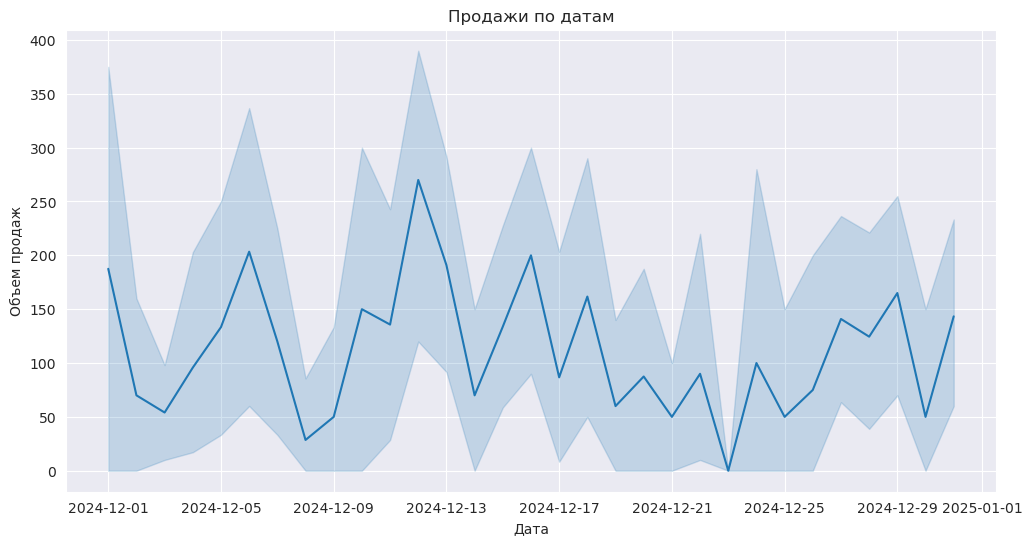

In [165]:
df = pd.read_csv("data/sales_cleaning_large.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].ffill()
df['date'] = df['date'].bfill()
median_sales = df['sales'].median()
df['sales'] = df['sales'].apply(lambda x: median_sales if x < 0 else x)
mean_sales = df['sales'].mean()
df['sales'] = df['sales'].fillna(mean_sales)

display(df)

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=df)
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.grid(True)
plt.show()

Задание 4

In [167]:
resp_data = requests.get('https://jsonplaceholder.typicode.com/users').json()
data = [{'id': user['id'],
         'name': user['name'],
         'email': user['email'],
         'company_name': user['company']['name']} for user in resp_data] 
df = pd.DataFrame(data)
filtred_df = df[df['company_name'].str.contains('Group', case=False, na=False)]
filtred_df

,id,name,email,company_name
6,7,Kurtis Weissnat,Telly.Hoeger@billy.biz,Johns Group
7,8,Nicholas Runolfsdottir V,Sherwood@rosamond.me,Abernathy Group
